# MODEL TRAINING USING THE NEURAL NETS


1.  WE HAVE 3483 TRAINING IMAGES OF FIVE DIFFERENT FLOWERS.
2.  WE HAVE METADETA FOR 3700 IMAGES IN LABLES.TXT

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### How TF reads and decodes images for classification.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

def read_and_decode(filename, reshape_dims):
  # 1. read file name and converts into tensors
  img = tf.io.read_file(filename)
  # 2. decodes images and respresents by 3D uint8 tensors of 3 channels namely RGB
  img = tf.io.decode_jpeg(img, channels=3)
  # 3. pixels consisting RGB values are converted into floats of ranges between [0,1]
  img = tf.image.convert_image_dtype(img, tf.float32)
  # 4. images are reized to their desired size
  img = tf.image.resize(img, reshape_dims)
  return img

In [2]:
def show_img(filename):
  img = read_and_decode(filename, (224,224))
  plt.imshow(img.numpy())
  plt.show

In [5]:
read_and_decode("/Users/karthiksagar/FiveFlowersRecognition/Dataset/flowers/daisy/25360380_1a881a5648.jpg", (224,224))

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.04313726, 0.04313726, 0.0509804 ],
        [0.03588936, 0.03588936, 0.04373249],
        [0.02713585, 0.02713585, 0.03497899],
        ...,
        [0.        , 0.        , 0.00063022],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.04067752, 0.04067752, 0.04852066],
        [0.03196779, 0.03196779, 0.03981093],
        [0.02321429, 0.02321429, 0.03105742],
        ...,
        [0.        , 0.        , 0.00063022],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.03576798, 0.03576798, 0.04361112],
        [0.02928046, 0.02928046, 0.0371236 ],
        [0.02052696, 0.02052696, 0.0283701 ],
        ...,
        [0.        , 0.        , 0.00063022],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.08208169, 0.1448268 , 0.09922085],
        [0.09

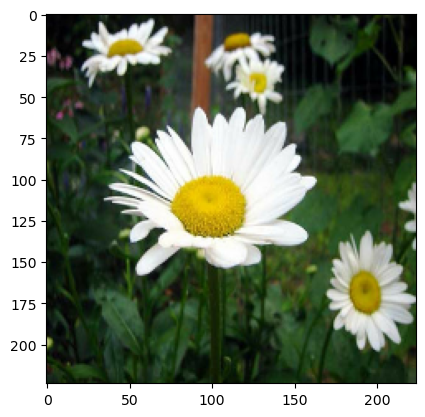

In [6]:
show_img("/Users/karthiksagar/FiveFlowersRecognition/Dataset/flowers/daisy/25360380_1a881a5648.jpg")

### DATA PREPROCESSING (SPLITTTING INTO TRAINING AND TESTING SETS)

The ImageDataGenerator class in Keras provides various arguments for data augmentation and preprocessing. Here are some commonly used arguments:

Image Augmentation:

rotation_range: Degree range for random rotations.


width_shift_range: Range for random horizontal shifts.


height_shift_range: Range for random vertical shifts.


shear_range: Shear intensity (Shear angle in counter-clockwise direction in degrees).


zoom_range: Range for random zoom.


horizontal_flip: Randomly flip inputs horizontally.


vertical_flip: Randomly flip inputs vertically.


fill_mode: Strategy to fill newly created pixels which can appear after a rotation or a width/height shift.


Pixel Normalization:


rescale: Multiplies each pixel value by this factor (e.g., 1./255 for scaling to [0,1]).
Other:


validation_split: Fraction of images reserved for validation (set it before calling flow_from_directory).


preprocessing_function: A function applied to each input before any other transformation.

In [13]:
from keras.preprocessing.image import ImageDataGenerator
import tensorflow
import os
import glob

# Create an ImageDataGenerator object
datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.25,
    vertical_flip=True,
    validation_split=0.2  # Set the validation split (e.g., 20%)
)

In [14]:
train_set = datagen.flow_from_directory(
    "/Users/karthiksagar/FiveFlowersRecognition/Dataset/flowers",
    target_size=(224, 224),  # Set your image dimensions
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

test_set = datagen.flow_from_directory(
    "/Users/karthiksagar/FiveFlowersRecognition/Dataset/flowers",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 2789 images belonging to 5 classes.
Found 694 images belonging to 5 classes.


In [15]:
train_set.class_indices # returns the index values of each class of flowers in train set

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [16]:
test_set.class_indices # returns the index values of each class of flowers in test set

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [17]:
train_set.image_shape # gives the image shape in the training images

(224, 224, 3)

In [18]:
def plot_img(img_arr, label):
    for img, lab in zip(img_arr, label):
        plt.figure(figsize=(5,5))
        plt.imshow(img)
        plt.show()

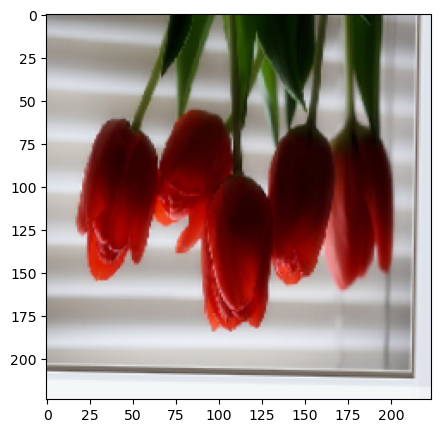

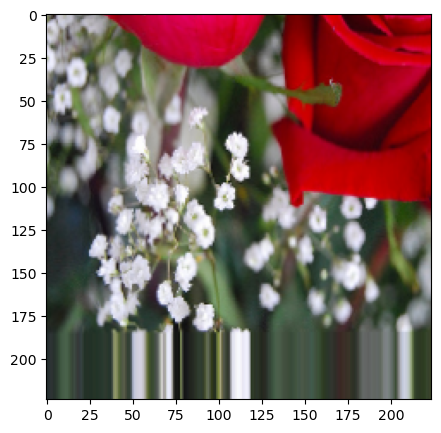

In [19]:
train_img, train_label = next(train_set)

plot_img(train_img[:2], train_label[:2])

## MODEL BUILDING

### LINEAR MODEL

No Hidden Layers. Only one Input Layer and one Output Layer

In [ ]:
## BUILDING SEQUENTIAL LINEAR MODEL

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.losses import CategoricalCrossentropy, BinaryCrossentropy, SparseCategoricalCrossentropy

In [ ]:
model = Sequential()    # actual image shape = 224X224X3
model.add(Flatten(input_shape=(224,224,3))) # Flatten Layer : 224*224*3 = 150528 pixels
model.add(Dropout(0.4))
model.add(Dense(5, activation='softmax')) # Dense Layer: 150528*5 = 752640 pixels + 5 (classes) = 752645 ---> softmax(752645) --> output

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss=CategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dropout_1 (Dropout)         (None, 150528)            0         
                                                                 
 dense_2 (Dense)             (None, 5)                 752645    
                                                                 
Total params: 752645 (2.87 MB)
Trainable params: 752645 (2.87 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=False)

In [ ]:
## training phase
history = model.fit(train_set, validation_data=test_set, epochs=10)

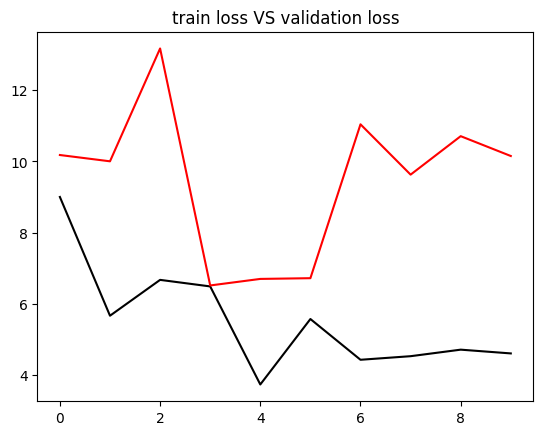

In [ ]:
plt.plot(history.history['loss'], c='black')
plt.plot(history.history['val_loss'], c='red')
plt.title("train loss VS validation loss")
plt.show()

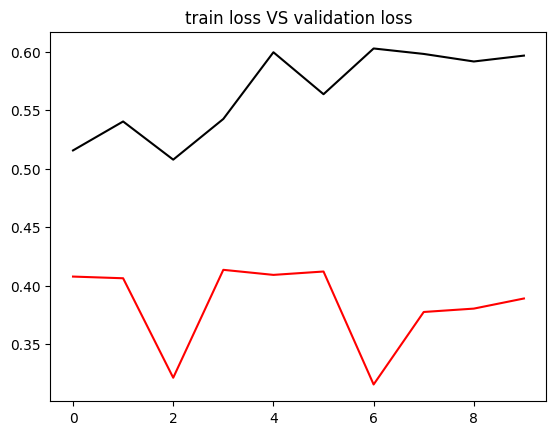

In [ ]:
plt.plot(history.history['accuracy'], c='black')
plt.plot(history.history['val_accuracy'], c='red')
plt.title("train loss VS validation loss")
plt.show()

### DEEP NEUREL NETWORK MODEL

Each Time You add a layer into the sequential model, the number of trainable parameters increases.

In [120]:
## BUILDING SEQUENTIAL NEURAL NETWORK MODEL

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1_l2, l2, l1
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.losses import CategoricalCrossentropy, BinaryCrossentropy, SparseCategoricalCrossentropy

In [61]:
model = Sequential()
model.add(Flatten(input_shape=(224,224,3)))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
# model.add(Dense(64, activation='relu'))
model.add(Dense(5, kernel_regularizer=l1_l2(l1=0.00, l2=0.00), activation='softmax'))

In [62]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 150528)            0         
                                                                 
 dense_18 (Dense)            (None, 128)               19267712  
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dense_19 (Dense)            (None, 5)                 645       
                                                                 
Total params: 19268869 (73.50 MB)
Trainable params: 19268613 (73.50 MB)
Non-trainable params: 256 (1.00 KB)
_________________________________________________________________


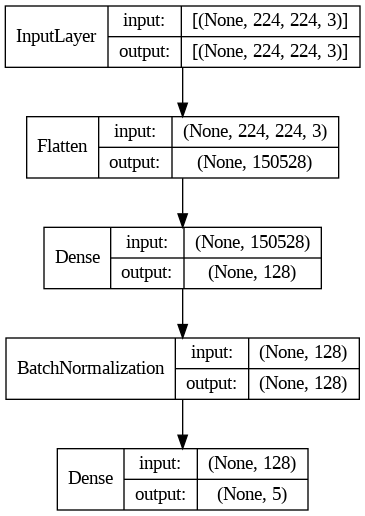

In [63]:
plot_model(model, show_shapes=True, show_layer_names=False)

In [64]:
model.compile(optimizer="Adam", loss="CategoricalCrossentropy", metrics=['accuracy'])

In [65]:
history = model.fit(train_set, validation_data=test_set, epochs=10)

Epoch 1/10
88/88 [==============================] - 21s 213ms/step - loss: 1.4099 - accuracy: 0.4098 - val_loss: 1.5361 - val_accuracy: 0.4078
Epoch 2/10
88/88 [==============================] - 19s 220ms/step - loss: 1.2410 - accuracy: 0.4772 - val_loss: 1.4192 - val_accuracy: 0.4107
Epoch 3/10
88/88 [==============================] - 19s 211ms/step - loss: 1.1783 - accuracy: 0.5117 - val_loss: 1.3336 - val_accuracy: 0.4524
Epoch 4/10
88/88 [==============================] - 19s 217ms/step - loss: 1.1464 - accuracy: 0.5253 - val_loss: 1.3258 - val_accuracy: 0.4524
Epoch 5/10
88/88 [==============================] - 19s 217ms/step - loss: 1.1030 - accuracy: 0.5543 - val_loss: 1.3595 - val_accuracy: 0.4222
Epoch 6/10
88/88 [==============================] - 19s 211ms/step - loss: 1.0878 - accuracy: 0.5658 - val_loss: 1.6124 - val_accuracy: 0.3862
Epoch 7/10
88/88 [==============================] - 20s 225ms/step - loss: 1.0449 - accuracy: 0.5848 - val_loss: 1.5603 - val_accuracy: 0.3905

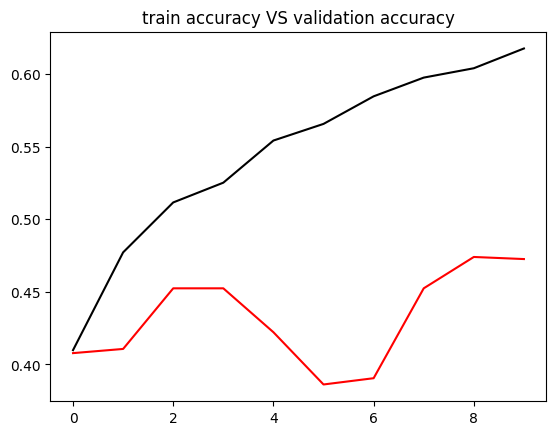

In [67]:
# train loss vs val loss
plt.plot(history.history['loss'], c='black')
plt.plot(history.history['val_loss'], c='red')
plt.title("train loss VS validation loss")
plt.show()

# train accuracy vs val accuracy
plt.plot(history.history['accuracy'], c='black')
plt.plot(history.history['val_accuracy'], c='red')
plt.title("train accuracy VS validation accuracy")
plt.show()

You would normally expect that adding layers to a model will improve the ability of the model to fit the training data, and thus lower the loss. Notice that it is not always the case though.

Now train a DNN. You need to parameterize the number of layers, and the number of nodes in each layer.

In [75]:
model = Sequential(name='flower_classification')
model.add(Flatten(input_shape=(224,224,3)))
model.add(Dense(64, kernel_regularizer=l1_l2(l1=0, l2=0.001), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(5, kernel_regularizer=l1_l2(l1=0.00, l2=0.00), activation='softmax'))

In [76]:
model.summary()

Model: "flower_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 150528)            0         
                                                                 
 dense_27 (Dense)            (None, 64)                9633856   
                                                                 
 dense_28 (Dense)            (None, 16)                1040      
                                                                 
 dense_29 (Dense)            (None, 5)                 85        
                                                                 
Total params: 9634981 (36.75 MB)
Trainable params: 9634981 (36.75 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [77]:
model.compile(optimizer=SGD(learning_rate=0.0001), loss="CategoricalCrossentropy", metrics=['accuracy'])

In [78]:
history= model.fit(train_set, validation_data=test_set, epochs=10)

Epoch 1/10
88/88 [==============================] - 21s 227ms/step - loss: 1.6994 - accuracy: 0.2775 - val_loss: 1.6598 - val_accuracy: 0.3343
Epoch 2/10
88/88 [==============================] - 19s 218ms/step - loss: 1.6109 - accuracy: 0.3514 - val_loss: 1.6070 - val_accuracy: 0.3790
Epoch 3/10
88/88 [==============================] - 19s 220ms/step - loss: 1.5498 - accuracy: 0.3883 - val_loss: 1.5527 - val_accuracy: 0.4020
Epoch 4/10
88/88 [==============================] - 19s 214ms/step - loss: 1.5026 - accuracy: 0.4123 - val_loss: 1.5272 - val_accuracy: 0.4294
Epoch 5/10
88/88 [==============================] - 19s 218ms/step - loss: 1.4751 - accuracy: 0.4367 - val_loss: 1.4986 - val_accuracy: 0.4222
Epoch 6/10
88/88 [==============================] - 19s 214ms/step - loss: 1.4556 - accuracy: 0.4367 - val_loss: 1.4753 - val_accuracy: 0.4207
Epoch 7/10
88/88 [==============================] - 19s 221ms/step - loss: 1.4234 - accuracy: 0.4579 - val_loss: 1.4722 - val_accuracy: 0.4510

28
1/1 [==============================] - 0s 20ms/step
2 : rose


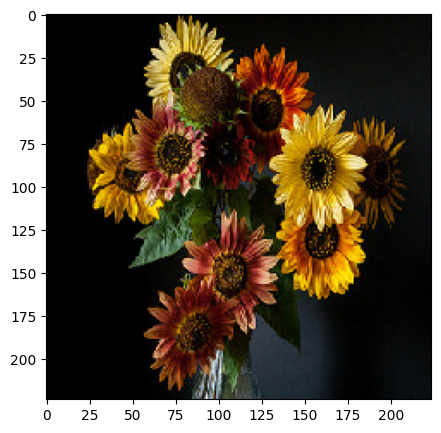

In [119]:
# predict a sample image from the test_set
num=np.random.randint(0,31)
print(num)
img, label = next(test_set)
pred= model.predict(img[num:num+1])
prediction= np.argmax(pred)
if prediction == 0:
  print("0 : daisy")
elif prediction == 1:
  print("1 : dandelion")
elif prediction == 2:
  print("2 : rose")
elif prediction == 3:
  print("3 : sunflower")
elif prediction == 4:
  print("4 : tulip")

plot_img(img[num:num+1], label[num:num+1])

### CONVOLUTIONAL NEURAL NETWORK MODEL

In [20]:
## BUILDING SEQUENTIAL CONVOLUTIONAL NEURAL NETWORK MODEL

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1_l2, l2, l1
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.losses import CategoricalCrossentropy, BinaryCrossentropy, SparseCategoricalCrossentropy
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [21]:
model = Sequential(name= 'Flower_Classification')
## INPUT LAYERS
# model.add(Flatten(input_shape=(224,224,3)))

## CONVOLUTIONAL LAYER 1
model.add(Conv2D(64, (3,3), strides= (1,1), padding='same', activation='relu', input_shape=(224,224,3), name="CONV1_BLOCK_1"))  # padding='valid' is default, padding= 'same' indicates padding should be added.
model.add(Conv2D(64, (3,3), strides= (1,1), padding='same', activation='relu', input_shape=(224,224,3), name='CONV2_BLOCK_1'))  # padding='valid' is default, padding= 'same' indicates padding should be added.
model.add(MaxPooling2D(pool_size= (2,2), strides= (2,2), name='BLOCK1_MAXPOOL1'))

# ## CONVOLUTIONAL LAYER 2
# model.add(Conv2D(128, (3,3), strides= (1,1), padding='same', activation='relu', input_shape=(224,224,3), name='CONV1_BLOCK_2'))  # padding='valid' is default, padding= 'same' indicates padding should be added.
# model.add(Conv2D(128, (3,3), strides= (1,1), padding='same', activation='relu', input_shape=(224,224,3), name='CONV2_BLOCK_2'))  # padding='valid' is default, padding= 'same' indicates padding should be added.
# model.add(MaxPooling2D(pool_size= (2,2), strides= (2,2), name='BLOCK2_MAXPOOL1'))

# ## CONVOLUTIONAL LAYER 3
# model.add(Conv2D(256, (3,3), strides= (1,1), padding='same', activation='relu', input_shape=(224,224,3), name='CONV1_BLOCK_3'))  # padding='valid' is default, padding= 'same' indicates padding should be added.
# model.add(Conv2D(256, (3,3), strides= (1,1), padding='same', activation='relu', input_shape=(224,224,3), name='CONV2_BLOCK_3'))  # padding='valid' is default, padding= 'same' indicates padding should be added.
# model.add(Conv2D(256, (3,3), strides= (1,1), padding='same', activation='relu', input_shape=(224,224,3), name='CONV3_BLOCK_3'))  # padding='valid' is default, padding= 'same' indicates padding should be added.
# model.add(MaxPooling2D(pool_size= (2,2), strides= (2,2), name='BLOCK3_MAXPOOL1'))

# ## CONVOLUTIONAL LAYER 4
# model.add(Conv2D(512, (3,3), strides= (1,1), padding='same', activation='relu', input_shape=(224,224,3), name='CONV1_BLOCK_4'))  # padding='valid' is default, padding= 'same' indicates padding should be added.
# model.add(Conv2D(512, (3,3), strides= (1,1), padding='same', activation='relu', input_shape=(224,224,3), name='CONV2_BLOCK_4'))  # padding='valid' is default, padding= 'same' indicates padding should be added.
# model.add(Conv2D(512, (3,3), strides= (1,1), padding='same', activation='relu', input_shape=(224,224,3), name='CONV3_BLOCK_4'))  # padding='valid' is default, padding= 'same' indicates padding should be added.
# model.add(MaxPooling2D(pool_size= (2,2), strides= (2,2), name='BLOCK4_MAXPOOL1'))

## Flatten the layer outputs
model.add(Flatten())

## OUTPUT LAYER
model.add(Dense(5, activation='softmax'))

In [22]:
model.summary()

Model: "Flower_Classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CONV1_BLOCK_1 (Conv2D)      (None, 224, 224, 64)      1792      
                                                                 
 CONV2_BLOCK_1 (Conv2D)      (None, 224, 224, 64)      36928     
                                                                 
 BLOCK1_MAXPOOL1 (MaxPoolin  (None, 112, 112, 64)      0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 802816)            0         
                                                                 
 dense (Dense)               (None, 5)                 4014085   
                                                                 
Total params: 4052805 (15.46 MB)
Trainable params: 4052805 (15.46 MB)
Non-trainable params: 0 (0.00 Byte)
_____

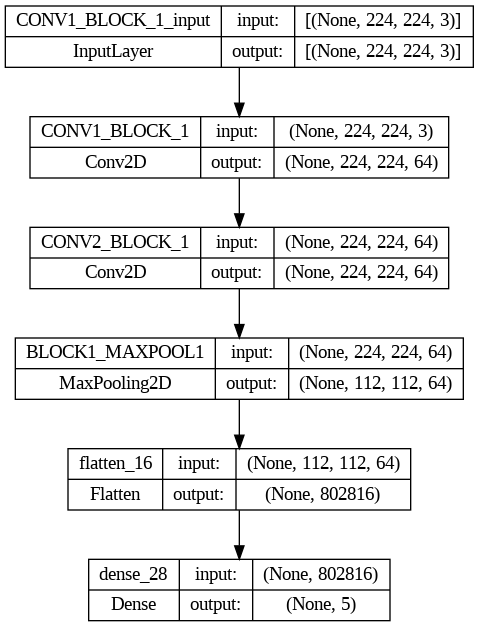

In [83]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [84]:
model.compile(optimizer="SGD", loss='categorical_crossentropy', metrics=['accuracy'])

## Early Stopping
es = EarlyStopping(monitor= 'val_accuracy', min_delta=0.01, patience=5, verbose= 1)

## Model Checkpoint
mc = ModelCheckpoint(filepath="/content/drive/MyDrive/FiveFlowersRecognition/Train_Test_Model/best_model.h5",  monitor= 'val_accuracy', min_delta=0.01, patience=5, verbose= 1, save_best_only= True)

callback = [es,mc]

In [85]:
history= model.fit_generator(train_set, validation_data=test_set, callbacks= callback, epochs=20)

<ipython-input-85-357a992dd60e>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history= model.fit_generator(train_set, validation_data=test_set, callbacks= callback, epochs=20)


Epoch 1/20
88/88 [==============================] - ETA: 0s - loss: 1.4378 - accuracy: 0.4044
Epoch 1: val_accuracy improved from -inf to 0.49424, saving model to /content/drive/MyDrive/FiveFlowersRecognition/Train_Test_Model/best_model.h5
88/88 [==============================] - 26s 280ms/step - loss: 1.4378 - accuracy: 0.4044 - val_loss: 1.1894 - val_accuracy: 0.4942
Epoch 2/20
88/88 [==============================] - ETA: 0s - loss: 1.1564 - accuracy: 0.5210
Epoch 2: val_accuracy improved from 0.49424 to 0.56196, saving model to /content/drive/MyDrive/FiveFlowersRecognition/Train_Test_Model/best_model.h5
88/88 [==============================] - 23s 261ms/step - loss: 1.1564 - accuracy: 0.5210 - val_loss: 1.1198 - val_accuracy: 0.5620
Epoch 3/20
88/88 [==============================] - ETA: 0s - loss: 1.0767 - accuracy: 0.5658
Epoch 3: val_accuracy did not improve from 0.56196
88/88 [==============================] - 25s 286ms/step - loss: 1.0767 - accuracy: 0.5658 - val_loss: 1.1225

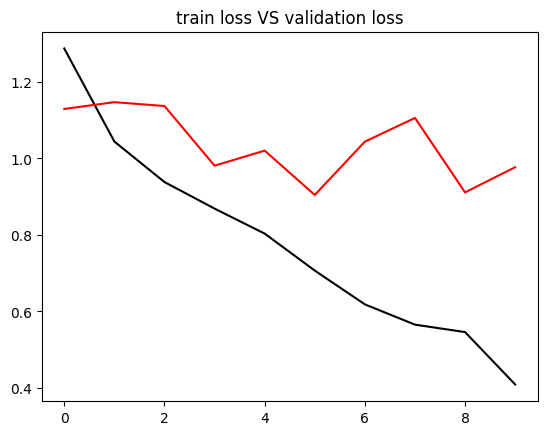

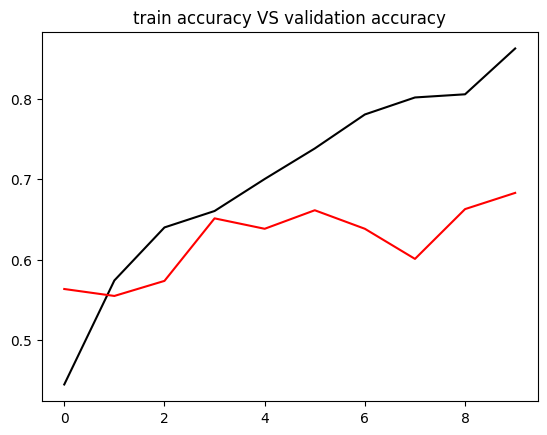

In [66]:
# train loss vs val loss
plt.plot(history.history['loss'], c='black')
plt.plot(history.history['val_loss'], c='red')
plt.title("train loss VS validation loss")
plt.show()

# train accuracy vs val accuracy
plt.plot(history.history['accuracy'], c='black')
plt.plot(history.history['val_accuracy'], c='red')
plt.title("train accuracy VS validation accuracy")
plt.show()

In [ ]:
# predict a sample image from the test_set
num=np.random.randint(0,31)
print(num)
img, label = next(test_set)
pred= model.predict(img[num:num+1])
prediction= np.argmax(pred)
if prediction == 0:
  print("0 : daisy")
elif prediction == 1:
  print("1 : dandelion")
elif prediction == 2:
  print("2 : rose")
elif prediction == 3:
  print("3 : sunflower")
elif prediction == 4:
  print("4 : tulip")

plot_img(img[num:num+1], label[num:num+1])

### HYPERPARAMETER FINDING - using Grid Search CV OR Bayessian Optimization

In [ ]:
#Import the necessary libraries
from kerastuner.tuners import BayesianOptimization
from kerastuner.engine.hyperparameters import HyperParameters

# Define the model architecture
def build_model(hp):
  model = Sequential(name= 'Five_Flower_Classification')

  # Tune the number of filters in the first convolutional layer
  hp_filters1 = hp.Int('filters1', min_value=32, max_value=128, step=32)
  model.add(Conv2D(filters=hp_filters1, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(224,224,3), name="CONV1_BLOCK_1"))
  model.add(Conv2D(filters=hp_filters1, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(224,224,3), name='CONV2_BLOCK_1'))
  model.add(MaxPooling2D(pool_size= (2,2), strides= (2,2), name='BLOCK1_MAXPOOL1'))

  # Tune the number of filters in the second convolutional layer
  hp_filters2 = hp.Int('filters2', min_value=64, max_value=256, step=64)
  model.add(Conv2D(filters=hp_filters2, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(224,224,3), name='CONV1_BLOCK_2'))
  model.add(Conv2D(filters=hp_filters2, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(224,224,3), name='CONV2_BLOCK_2'))
  model.add(MaxPooling2D(pool_size= (2,2), strides= (2,2), name='BLOCK2_MAXPOOL1'))

  model.add(Flatten())

  # Tune the number of units in the dense layer
  hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
  model.add(Dense(units=hp_units, activation='relu'))

  # Tune the dropout rate
  hp_dropout = hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)
  model.add(Dropout(rate=hp_dropout))

  model.add(Dense(5, activation='softmax'))

  # Tune the learning rate for the optimizer
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
  model.compile(optimizer=Adam(learning_rate=hp_learning_rate),
                loss=CategoricalCrossentropy(from_logits=False),
                metrics=['accuracy'])

  return model

# Instantiate the tuner
tuner = BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Number of hyperparameter combinations to try
    executions_per_trial=2,  # Number of models to train per combination
    directory='/Users/karthiksagar/FiveFlowersRecognition/ParameterOptimization',
    project_name='flower_classification'
)

# Perform hyperparameter search
tuner.search(train_set,
             epochs=10,
             validation_data=test_set)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Train the best model
history = best_model.fit(train_set, validation_data=test_set, epochs=10)

# Evaluate the best model
test_loss, test_acc = best_model.evaluate(test_set)
print('Test accuracy:', test_acc)